# Introduction

    
  ## Soccer Dataset
  I have decided to work with the 'Soccer Database' for my project.It contains data for soccer matches, players, and teams from several European countries from 2008 to 2016.
  
  
  ## Question for my analysis
  1.Which League had the highest total scoring of goals by home teams over the eight seasons?
  The reason for this question is to find out the most entertaining league.This is the criteria i have chosen to help me identify the most entertaining league.

### Installing of packages
I begin by installing all packages needed for my data analysis process.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')




# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.1
!pip install --upgrade ipykernel==5.1.2

Requirement already up-to-date: pandas==0.25.1 in /opt/conda/lib/python3.6/site-packages (0.25.1)
Requirement already up-to-date: ipykernel==5.1.2 in /opt/conda/lib/python3.6/site-packages (5.1.2)


## Data Wrangling
Due to the extensive nature of the dataset, i have decided to work with a selected number of datasets since they are the ones i need to arrive at my answer.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
df_country = pd.read_csv("Database_Soccer/Country.csv")
df_league = pd.read_csv("Database_Soccer/League.csv")
df_match = pd.read_csv("Database_Soccer/Match.csv")


##  Data Exploration
The explanatory file of this dataset gave me a brief understanding of the data but further exploration of the dataset will give me an in depth understanding.In this stage, i explore the data further and also look for datasets that require cleaning or trimming.Some things i'll be looking out for are null sets, duplicates of data and shape.

In [4]:
df_country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [5]:
df_country.shape

(11, 2)

In [6]:
df_country.count()

id      11
name    11
dtype: int64

In [7]:
df_country.duplicated().sum()

0

In [8]:
df_country.isna().sum()

id      0
name    0
dtype: int64

## Findings
The above 'df_country' appears to be clean since its free from null sets and duplicated values.
Same methods or more will be applied if necessary on the subsequent datasets.

In [9]:
df_league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [10]:
df_league.shape

(11, 3)

In [11]:
df_league.count

<bound method DataFrame.count of        id  country_id                      name
0       1           1    Belgium Jupiler League
1    1729        1729    England Premier League
2    4769        4769            France Ligue 1
3    7809        7809     Germany 1. Bundesliga
4   10257       10257             Italy Serie A
5   13274       13274    Netherlands Eredivisie
6   15722       15722        Poland Ekstraklasa
7   17642       17642  Portugal Liga ZON Sagres
8   19694       19694   Scotland Premier League
9   21518       21518           Spain LIGA BBVA
10  24558       24558  Switzerland Super League>

In [12]:
df_country.duplicated().sum()

0

In [13]:
df_country.isna().sum()

id      0
name    0
dtype: int64

In [14]:
df_match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Trimming of unwanted columns
df_match appears to have columns which i would not need for my analysis.I have decided to trim it to my desired number of columns

In [15]:
df_match.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal',
       ...
       'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object', length=115)

In [16]:
df_match_subset = df_match[['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal']]

In [17]:
df_match_subset

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3
...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,0
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,2
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,0
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,0


In [18]:
df_match_subset.describe()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000
25%,6495.500000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000
50%,12990.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000
75%,19484.500000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000


In [19]:
df_match_subset.duplicated().sum()

0

In [20]:
df_match_subset.isna().sum()

id                  0
country_id          0
league_id           0
season              0
stage               0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
dtype: int64

## Visualisation Of Features
I will view the features of the dataset using graphs namely;histogram and scatter graphs.

### Histogram for various features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ba8eda828>,
      dtype=object)

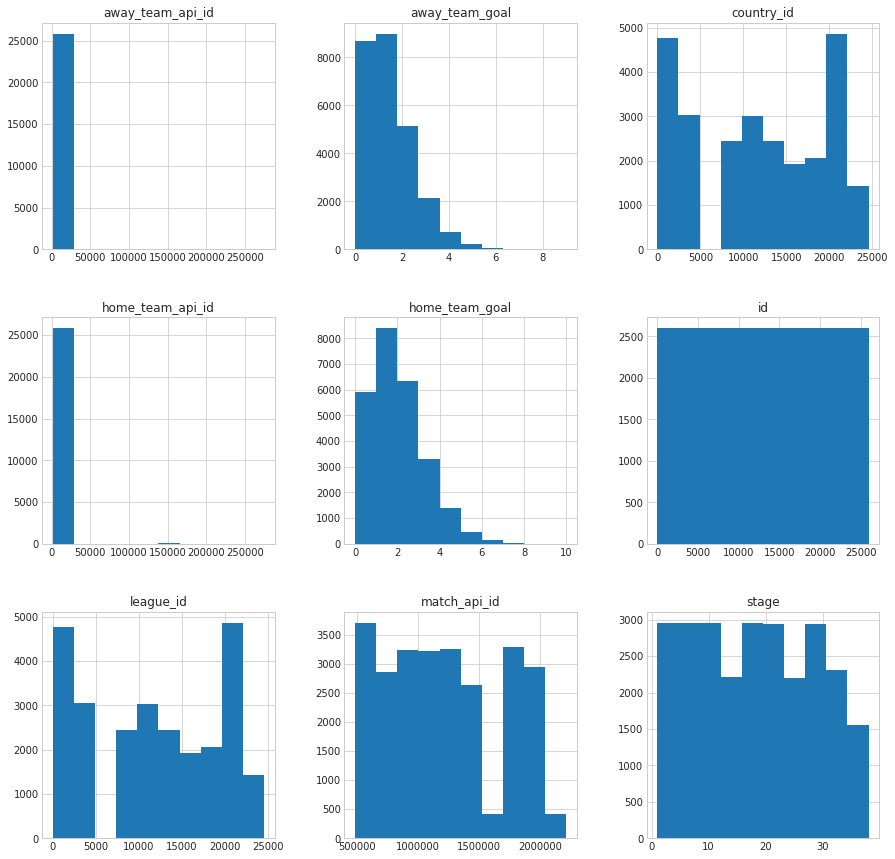

In [21]:
df_match_subset.hist(figsize = (15,15))

## Scatter Plot For Various Features

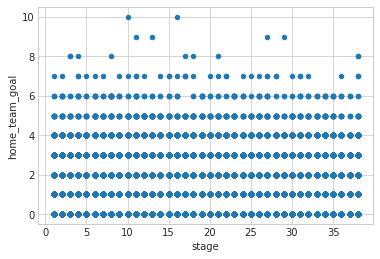

In [22]:
df_match_subset.plot(x="stage", y="home_team_goal", kind="scatter");

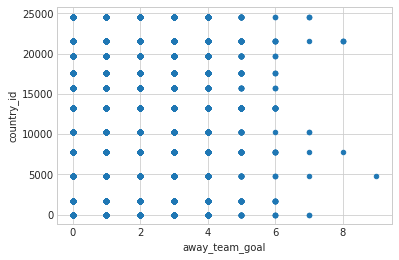

In [23]:
df_match_subset.plot(y="country_id", x="away_team_goal", kind="scatter");

## Cleaning of Data
The datasets all appear to be clean hence require no cleaning process.

## Merging Of Tables
I am merging the three data tables into one.This is to help me use the groupby function effectively.My merging process will be in two stages, first is to merge 'df_country' with 'df_league' then to merge that with 'df_match'.

In [24]:
first_merge = pd.merge(df_country, df_league, on='id',)
first_merge

,id,name_x,country_id,name_y
0,1,Belgium,1,Belgium Jupiler League
1,1729,England,1729,England Premier League
2,4769,France,4769,France Ligue 1
3,7809,Germany,7809,Germany 1. Bundesliga
4,10257,Italy,10257,Italy Serie A
5,13274,Netherlands,13274,Netherlands Eredivisie
6,15722,Poland,15722,Poland Ekstraklasa
7,17642,Portugal,17642,Portugal Liga ZON Sagres
8,19694,Scotland,19694,Scotland Premier League
9,21518,Spain,21518,Spain LIGA BBVA


In [25]:
Table = pd.merge(first_merge, df_match_subset, on='country_id')
Table

,id_x,name_x,country_id,name_y,id_y,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,Belgium,1,Belgium Jupiler League,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,1,Belgium,1,Belgium Jupiler League,2,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,1,Belgium,1,Belgium Jupiler League,3,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,1,Belgium,1,Belgium Jupiler League,4,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,1,Belgium,1,Belgium Jupiler League,5,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,24558,Switzerland,24558,Switzerland Super League,25975,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,0
25975,24558,Switzerland,24558,Switzerland Super League,25976,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,2
25976,24558,Switzerland,24558,Switzerland Super League,25977,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,0
25977,24558,Switzerland,24558,Switzerland Super League,25978,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,0


## Renaming Of Columns
The merge was successful but column names were changed.I'll change selected column names to my preferred names.

In [26]:
Table.rename({'name_x':'country', 'name_y':'league'}, axis=1, inplace=True)

In [27]:
Table

,id_x,country,country_id,league,id_y,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,Belgium,1,Belgium Jupiler League,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,1,Belgium,1,Belgium Jupiler League,2,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,1,Belgium,1,Belgium Jupiler League,3,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,1,Belgium,1,Belgium Jupiler League,4,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,1,Belgium,1,Belgium Jupiler League,5,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,24558,Switzerland,24558,Switzerland Super League,25975,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,0
25975,24558,Switzerland,24558,Switzerland Super League,25976,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,2
25976,24558,Switzerland,24558,Switzerland Super League,25977,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,0
25977,24558,Switzerland,24558,Switzerland Super League,25978,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,0


# Exploratory Data Analysis
I have been able to trim, merge and rename a few columns.That sets me for the Exploratory data analysis stage where i compute statistics and create visualizations with the goal of addressing the research question that I posed in the Introduction section.

## 1.Which League had the highest total scoring of goals by home teams over the eight seasons?

To arrive at my  results  the I shall use the groupby function.I'm then going to visualize my findings into different graphs to understand the correlation and relationships between the selected variables.

In [28]:
Table

,id_x,country,country_id,league,id_y,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,Belgium,1,Belgium Jupiler League,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,1,Belgium,1,Belgium Jupiler League,2,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,1,Belgium,1,Belgium Jupiler League,3,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,1,Belgium,1,Belgium Jupiler League,4,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,1,Belgium,1,Belgium Jupiler League,5,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,24558,Switzerland,24558,Switzerland Super League,25975,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,0
25975,24558,Switzerland,24558,Switzerland Super League,25976,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,2
25976,24558,Switzerland,24558,Switzerland Super League,25977,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,0
25977,24558,Switzerland,24558,Switzerland Super League,25978,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,0


## Groupingby
With the groupby, i am going to pull out the sum of home goals scored by a specific group which in this context shall be the various leagues from the league column.

In [29]:
Table_grp = Table.groupby(['league']).home_team_goal.sum()
Table_grp

league
Belgium Jupiler League      2781
England Premier League      4715
France Ligue 1              4265
Germany 1. Bundesliga       3982
Italy Serie A               4528
Netherlands Eredivisie      4357
Poland Ekstraklasa          2678
Portugal Liga ZON Sagres    2890
Scotland Premier League     2607
Spain LIGA BBVA             4959
Switzerland Super League    2365
Name: home_team_goal, dtype: int64

## Visualisation Of Results
I have been able to get results but will visualize it for futher analysis.I'll select the bar graph and pie chart for visualisation since i find it optimum in this scenario.

Text(0,0.5,'Number of Goals')

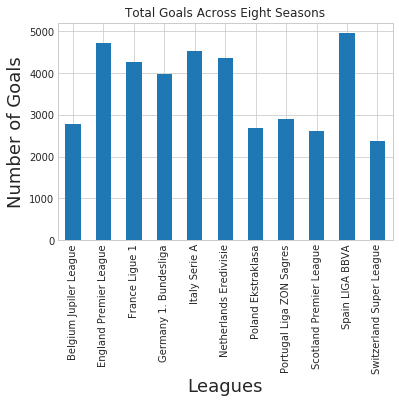

In [30]:
Table_grp.plot(kind='bar', title='Total Goals Across Eight Seasons')
plt.xlabel('Leagues', fontsize=18)
plt.ylabel('Number of Goals', fontsize=18)

### Findings from the bar plot 
From the bar graph plotted, quite a number of goals were scored by home teams across each leagues but Spain LIGA BBVA had the highest number of home goals scored with Switzerland Super League returning the least goals scored.

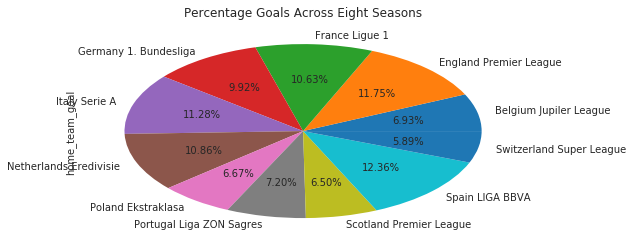

In [31]:
Table_grp.plot(kind='pie', title='Percentage Goals Across Eight Seasons', autopct='%1.2f%%', figsize=(8,4))


### Findings from the pie chart
The pie chart visualised the goals in colored portions and assigned to each their various percantages out of the whole.
Spain LIGA BBVA contributed for the highest percentage of goals followed by England Premier League and Italy Serie A respectively. 

## Conclusions
The analysis was succesful.The objective was achieved  and the reults were visualised with the bar and pie charts.According to the findings, Spain LIGA BBVA was the league with the highest scoring home goals.The total sum of goals over the recorded period were four thousand nine hundred and fifty-nine(4959) goals which covers for 12.36% of the total goals scored in the eight seasons.

## Limitations and shortcomings
Not being able to access data on the number of home goals scored by the various teams in the dataset came across as a limitation to my project.I believe this analysis can be improved getting more  on in depth findings like the one earlier mentioned.

In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255

In [ ]:
https://github.com/Adelaitar150/desktop-tutorial.git